MongoDB에서 label_math컬렉션을 가져옴

In [3]:
import pandas as pd
from pymongo import MongoClient
from bson import ObjectId

# MongoDB 연결 설정
username = 'root'
password = 'qwe123'
host = '10.41.2.78'
port = 27017

# MongoDB 클라이언트 연결
client = MongoClient(f'mongodb://{username}:{password}@{host}:{port}/')
db = client['project']
collection = db['math_knowledge_data_set']

def mongo_to_dataframe():
    # MongoDB에서 데이터 가져오기
    data = list(collection.find({}))  # 모든 데이터를 리스트로 가져오기

    # 데이터가 빈 경우 처리
    if not data:
        return pd.DataFrame()

    # ObjectId를 문자열로 변환
    for entry in data:
        if '_id' in entry and isinstance(entry['_id'], ObjectId):
            entry['_id'] = str(entry['_id'])

    # 데이터를 담을 리스트 초기화
    records = []

    # 모든 데이터를 순회하여 처리
    for entry in data:
        for key, value in entry.items():
            if key.isdigit():  # '0', '1', ..., '3445' 같은 키 값
                from_concept = value.get('fromConcept', {})
                to_concept = value.get('toConcept', {})

                # fromConcept 및 toConcept의 데이터프레임 변환
                from_df = pd.json_normalize(from_concept, sep='_').add_prefix('from_')
                to_df = pd.json_normalize(to_concept, sep='_').add_prefix('to_')

                # 각각의 데이터프레임을 하나의 데이터프레임으로 병합
                combined_df = pd.concat([from_df, to_df], axis=1)

                # ID 컬럼을 추가하여 데이터 식별
                combined_df['id'] = key
                records.append(combined_df)

    # 모든 DataFrame을 하나로 병합
    final_df = pd.concat(records, ignore_index=True)

    return final_df

# 데이터프레임 가져오기
label_math = mongo_to_dataframe()


In [ ]:
label_math

,from_id,from_name,from_semester,from_description,from_chapter_id,from_chapter_name,from_achievement_id,from_achievement_name,to_id,to_name,to_semester,to_description,to_chapter_id,to_chapter_name,to_achievement_id,to_achievement_name,id
0,3249,거듭제곱,고등-수1-전체,임의의 수 $a$와 양의 정수 $n$에 대하여 $a$를 $n$개 거듭하여 곱한 것을...,587,지수함수와 로그함수 > 지수 > 거듭제곱과 거듭제곱근,314,"거듭제곱과 거듭제곱근의 뜻을 알고, 그 성질을 설명할 수 있다.",1442,거듭제곱,중등-중2-1학기,같은 수나 문자를 거듭하여 곱한 것을 간단히 나타낸 것,481,식의 계산 > 단항식의 계산 > 지수법칙,88,지수법칙을 이해한다.,0
1,3,지수가 자연수일 때의 지수법칙,고등-수1-전체,"$a$, $b$가 실수이고 $m$, $n$이 자연수일 때\n\n(1)$a^ma^n=...",587,지수함수와 로그함수 > 지수 > 거듭제곱과 거듭제곱근,314,"거듭제곱과 거듭제곱근의 뜻을 알고, 그 성질을 설명할 수 있다.",4659,지수법칙 (2) - 지수의 곱,중등-중2-1학기,"m,n이 자연수일 때\n$(a^m)^n=a^{mn}$",481,식의 계산 > 단항식의 계산 > 지수법칙,88,지수법칙을 이해한다.,1
2,3,지수가 자연수일 때의 지수법칙,고등-수1-전체,"$a$, $b$가 실수이고 $m$, $n$이 자연수일 때\n\n(1)$a^ma^n=...",587,지수함수와 로그함수 > 지수 > 거듭제곱과 거듭제곱근,314,"거듭제곱과 거듭제곱근의 뜻을 알고, 그 성질을 설명할 수 있다.",4660,지수법칙 (3) - 지수의 차,중등-중2-1학기,"$a\ne0$이고 m, n이 자연수일 때\n$a^m\div a^n=\begin{ca...",481,식의 계산 > 단항식의 계산 > 지수법칙,88,지수법칙을 이해한다.,2
3,3,지수가 자연수일 때의 지수법칙,고등-수1-전체,"$a$, $b$가 실수이고 $m$, $n$이 자연수일 때\n\n(1)$a^ma^n=...",587,지수함수와 로그함수 > 지수 > 거듭제곱과 거듭제곱근,314,"거듭제곱과 거듭제곱근의 뜻을 알고, 그 성질을 설명할 수 있다.",4661,지수법칙 (4) - 지수의 분배,중등-중2-1학기,n이 자연수일 때\n1) $(ab)^n=a^nb^n$\n2) $(\frac{a}{b...,481,식의 계산 > 단항식의 계산 > 지수법칙,88,지수법칙을 이해한다.,3
4,4,거듭제곱근,고등-수1-전체,방정식 $x^n=a$의 근 $x$를 $a$의 $n$제곱근이라 한다.\n이때 실수 $...,587,지수함수와 로그함수 > 지수 > 거듭제곱과 거듭제곱근,314,"거듭제곱과 거듭제곱근의 뜻을 알고, 그 성질을 설명할 수 있다.",3249,거듭제곱,고등-수1-전체,임의의 수 $a$와 양의 정수 $n$에 대하여 $a$를 $n$개 거듭하여 곱한 것을...,587,지수함수와 로그함수 > 지수 > 거듭제곱과 거듭제곱근,314,"거듭제곱과 거듭제곱근의 뜻을 알고, 그 성질을 설명할 수 있다.",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,11269,천만 단위까지의 수 알아보기,초등-초4-1학기,"10000이 1365개인 수- 쓰기: 13560000또는 1356만, 읽기: 천삼백...",223,"큰 수 > 십만, 백만, 천만을 알아볼까요",11,10000 이상의 큰 수에 대한 자릿값과 위치적 기수법을 원리를 이해한다.,7268,다섯 자릿수,초등-초4-1학기,"1.다섯 자릿수 알아보기\n10000이 2개, 1000이 3개, 100이 8개, 1...",222,큰 수 > 다섯 자릿수를 알아볼까요,10,10000 이상의 큰 수를 읽고 쓸 수 있다.,3441
3442,11270,천억 단위까지의 수 알아보기,초등-초4-1학기,1억이 7365개인 수\n- 쓰기: 736500000000또는 7365억\n- 읽기...,224,큰 수 > 억과 조를 알아볼까요,11,10000 이상의 큰 수에 대한 자릿값과 위치적 기수법을 원리를 이해한다.,11269,천만 단위까지의 수 알아보기,초등-초4-1학기,"10000이 1365개인 수- 쓰기: 13560000또는 1356만, 읽기: 천삼백...",223,"큰 수 > 십만, 백만, 천만을 알아볼까요",11,10000 이상의 큰 수에 대한 자릿값과 위치적 기수법을 원리를 이해한다.,3442
3443,11271,천조 단위까지의 수 알아보기,초등-초4-1학기,1조가 2761개인 수\n- 쓰기: 2761000000000000 또는 2761조\...,224,큰 수 > 억과 조를 알아볼까요,11,10000 이상의 큰 수에 대한 자릿값과 위치적 기수법을 원리를 이해한다.,11270,천억 단위까지의 수 알아보기,초등-초4-1학기,1억이 7365개인 수\n- 쓰기: 736500000000또는 7365억\n- 읽기...,224,큰 수 > 억과 조를 알아볼까요,11,10000 이상의 큰 수에 대한 자릿값과 위치적 기수법을 원리를 이해한다.,3443
3444,8481,각도의 합과 차,초등-초4-1학기,"각도의 합과 차는 자연수의 덧셈, 뺄셈과 같은 방법으로 계산합니다.",232,각도 > 각도의 합과 차는 얼마일까요,NaN,nan,7310,받아 올림이 세 번 있는 $(세자릿수)+(세자릿수)$,초등-초3-1학기,"1. 각 자리의 숫자를 맞추어 적습니다.\n2. 일의 자리, 십의 자리, 백의 자리...",148,덧셈과 뺄셈 > 덧셈을 해 볼까요 (3),53,받아 올림이 있는 (세 자릿수)+(세 자릿수)의 계산 원리를 이해하고 그 계산을 할...,3444


label_math 전처리

In [ ]:
# from_g와 to_g 열 생성
label_math['from_g'] = label_math['from_semester'].apply(lambda x: x.split('-')[0])
label_math['to_g'] = label_math['to_semester'].apply(lambda x: x.split('-')[0])
# 필터링 조건 적용: 고등 포함 / 중등만 포함한 경우 제외
label_math_ele = label_math[
    ~(
        ((label_math['from_g'] == '고등') | (label_math['to_g'] == '고등')) |
        ((label_math['from_g'] == '중등') & (label_math['to_g'] == '중등'))
    )
]
# 치환을 위한 딕셔너리 생성
replacement_dict = {
    '중등-중1-1학기': '중등-중7-1학기',
    '중등-중2-2학기': '중등-중8-2학기',
    '중등-중1-2학기': '중등-중7-2학기',
    '중등-중2-1학기': '중등-중8-1학기',
    '중등-중3-1학기': '중등-중9-1학기',
    '중등-중3-2학기': '중등-중9-2학기'
}
# 'from_g'가 '중등'인 행들의 'from_semester' 값을 딕셔너리 대로 치환
label_math_ele.loc[label_math_ele['from_g'] == '중등', 'from_semester'] = label_math_ele['from_semester'].replace(replacement_dict)

mongoDB로 부터 JSON파일을 DataFrame으로 변환

In [ ]:
from pymongo import MongoClient
import pandas as pd

# MongoDB 연결 설정 (사용자 이름과 비밀번호 포함)
username = 'root'  # MongoDB 사용자 이름
password = 'qwe123'  # MongoDB 사용자 비밀번호
host = '10.41.2.78'  # MongoDB 호스트 주소 (예: localhost)
port = 27017  # MongoDB 포트 (기본: 27017)

# MongoDB 클라이언트 연결 (인증 정보 포함)
client = MongoClient(f'mongodb://{username}:{password}@{host}:{port}/')
db = client['project']  # 데이터베이스 이름 설정

In [ ]:
# 컬렉션 선택
qa_collection = db['1_correct_answer']
irt_collection = db['2_questionIRT']
taker_irt_collection = db['3_candidateIRT']

# 데이터를 데이터프레임으로 변환하는 함수
def fetch_collection_as_dataframe(collection):
    data = list(collection.find({}))
    return pd.DataFrame(data)

# 각 컬렉션에서 데이터 가져오기
qa_df = fetch_collection_as_dataframe(qa_collection)
irt_df = fetch_collection_as_dataframe(irt_collection)
taker_irt_df = fetch_collection_as_dataframe(taker_irt_collection)

# 데이터 프레임 병합
merged_df = pd.merge(qa_df, irt_df, on=['testID', 'assessmentItemID'], how='left')
merged_df = pd.merge(merged_df, taker_irt_df, on=['learnerID', 'testID'], how='left')

In [ ]:
# 불필요한 컬럼 삭제
columns_to_drop = ['_id_x', 'Timestamp_x', '_id_y', 'Timestamp_y', '_id', 'Timestamp', 'learnerProfile_y']
merged_df = merged_df.drop(columns=columns_to_drop)

# 'learnerProfile_x' 컬럼의 이름을 'learnerProfile'로 변경
merged_df = merged_df.rename(columns={'learnerProfile_x': 'learnerProfile'})
merged_df['knowledgeTag'] = pd.to_numeric(merged_df['knowledgeTag'], errors='coerce', downcast='integer')


In [ ]:
merged_df

,learnerID,learnerProfile,testID,assessmentItemID,answerCode,difficultyLevel,discriminationLevel,guessLevel,knowledgeTag,theta,realScore
0,A010000003,F;S01;1,A010000001,A010001001,1,-3.719715,0.721179,1.008904e-02,5844,0.196765,0.967829
1,A010000003,F;S01;1,A010000001,A010001002,1,-2.917577,1.349719,1.278008e-02,5844,0.196765,0.967829
2,A010000003,F;S01;1,A010000001,A010001003,1,-2.273138,1.192981,5.012783e-02,5844,0.196765,0.967829
3,A010000003,F;S01;1,A010000001,A010001004,1,-2.302867,1.732754,6.223898e-03,5844,0.196765,0.967829
4,A010000003,F;S01;1,A010000001,A010001005,1,-1.611647,1.911265,2.348796e-04,5844,0.196765,0.967829
...,...,...,...,...,...,...,...,...,...,...,...
1677353,A090000552,M;S01;9,A090000074,A090074002,1,0.012002,54.381941,2.930000e-08,4243,0.785694,0.706491
1677354,A090000552,M;S01;9,A090000074,A090074003,1,-0.725795,0.416779,1.159106e-02,4243,0.785694,0.706491
1677355,A090000552,M;S01;9,A090000074,A090074004,1,0.450923,4.251689,0.000000e+00,10196,0.785694,0.706491
1677356,A090000552,M;S01;9,A090000074,A090074005,1,2.126145,0.240034,3.483607e-02,2648,0.785694,0.706491


postgresql에서 education_2022 dataframe으로 변환 + 전처리

In [ ]:
import pandas as pd
from sqlalchemy import create_engine

# 연결 정보 설정
db_config = {
    'host': "10.41.2.78",
    'port': "5432",
    'user': "postgres",
    'pw': "qwe123",
    'db': "project",
    'location': "localhost_target",
    'engine': "postgre",
    'table_name': "education_2022"
}

# 데이터베이스 URL 구성
db_url = f"postgresql://{db_config['user']}:{db_config['pw']}@{db_config['host']}:{db_config['port']}/{db_config['db']}"

# SQLAlchemy를 사용하여 PostgreSQL에 연결하는 엔진 생성
engine = create_engine(db_url)

# SQL 쿼리 정의 (테이블의 모든 데이터를 선택)
query = f"SELECT * FROM {db_config['table_name']}"

# 쿼리 실행 및 결과를 DataFrame으로 변환
education_2022 = pd.read_sql(query, engine)

# 'Unnamed: 6' 컬럼을 제거
education_2022 = education_2022.drop(columns=['Unnamed: 6'], errors='ignore')

# '계열화' 컬럼의 NaN 값을 '정보 없음'으로 대체
education_2022['계열화'] = education_2022['계열화'].fillna('정보 없음')


In [ ]:
education_2022


,ID,Name,영역명,내용요소,계열화,grade
0,2048,큰 수 > 억과 조를 알아볼까요 / 큰 수 > 억과 조를 알아볼까요,수와 연산,다섯 자리 이상의 수,A-4-7,4-1
1,2049,큰 수 > 뛰어 세기를 해 볼까요,수와 연산,다섯 자리 이상의 수,A-4-9,4-1
2,2050,큰 수 > 수의 크기를 비교해 볼까요 / 큰 수 > 수의 크기를 비교해 볼까요,수와 연산,다섯 자리 이상의 수,A-4-10,4-1
3,2052,각도 > 어느 각이 더 클까요,도형과 측정(도형),도형의 기초,C-3-3,4-1
4,2053,각도 > 각의 크기는 얼마일까요,도형과 측정(측정),각도( ° ),D-8-1,4-1
...,...,...,...,...,...,...
637,10741,제곱근과 실수 > 제곱근과 실수 > 무리수와 실수,수와 연산,제곱근과 실수,정보 없음,9-1
638,5141,제곱근과 실수 > 제곱근과 실수 > 무리수와 실수,수와 연산,제곱근과 실수,정보 없음,9-1
639,5142,제곱근과 실수 > 제곱근과 실수 > 실수의 대소 관계,수와 연산,제곱근과 실수,정보 없음,9-1
640,5921,제곱근과 실수 > 제곱근과 실수 > 무리수와 실수,수와 연산,제곱근과 실수,정보 없음,9-1


학생이 맞춘 knowledgeTag와 틀린 knowledgeTag의 빈도수가 많은걸 가져와 이후, 이전 학습을 추천해줌

In [ ]:
# import pandas as pd
# from collections import defaultdict
# import re
# import numpy as np


# # NaN 값을 빈 문자열로 대체
# label_math_ele['from_chapter_name'].fillna('', inplace=True)
# label_math_ele['to_chapter_name'].fillna('', inplace=True)


# def extract_semester(semester_str):
#     if pd.isna(semester_str):
#         return ''
#     match = re.search(r'(\d+)-(\d+)', semester_str)
#     return (int(match.group(1)), int(match.group(2))) if match else (None, None)


# def parse_series_order(order_str):
#     if not order_str:  # None 또는 빈 문자열일 때
#         return ('ZZZ', float('inf'), float('inf'))  # Default value (정렬 우선순위 가장 낮음)
#     match = re.match(r'([A-Z]+)-(\d+)-(\d+)', order_str)
#     if match:
#         return (match.group(1), int(match.group(2)), int(match.group(3)))
#     return ('ZZZ', float('inf'), float('inf'))  # Default value for malformed input (정렬 우선순위 가장 낮음)


# def get_unique_id_name_pairs(df):
#     to_id_name = dict(zip(df['to_id'], df['to_chapter_name']))
#     from_id_name = dict(zip(df['from_id'], df['from_chapter_name']))
#     all_ids = set(to_id_name.keys()).union(set(from_id_name.keys()))
#     unique_id_name_pairs = {}
#     unique_id_semesters = {}
#     for id_ in all_ids:
#         to_name = to_id_name.get(id_, '')
#         from_name = from_id_name.get(id_, '')
#         if to_name and from_name:
#             unique_id_name_pairs[id_] = f'{to_name} / {from_name}'
#         elif to_name:
#             unique_id_name_pairs[id_] = to_name
#         elif from_name:
#             unique_id_name_pairs[id_] = from_name
#         from_semester = df[df['from_id'] == id_]['from_semester'].values
#         to_semester = df[df['to_id'] == id_]['to_semester'].values
#         if len(from_semester) > 0:
#             unique_id_semesters[id_] = extract_semester(from_semester[0])
#         elif len(to_semester) > 0:
#             unique_id_semesters[id_] = extract_semester(to_semester[0])
#         else:
#             unique_id_semesters[id_] = (None, None)
#     return unique_id_name_pairs, unique_id_semesters


# # 본개념과 ID-이름 쌍, 학기 정보 가져오기
# unique_id_name_pairs, unique_id_semesters = get_unique_id_name_pairs(label_math_ele)


# # education_2022 데이터를 ID를 기준으로 매칭할 수 있도록 딕셔너리 생성
# education_mapping = education_2022.set_index('ID').to_dict('index')
# predecessors = defaultdict(list)
# successors = defaultdict(list)
# to_chapter_names = dict(zip(label_math_ele['to_id'], label_math_ele['to_chapter_name']))
# from_chapter_names = dict(zip(label_math_ele['from_id'], label_math_ele['from_chapter_name']))
# for _, row in label_math_ele.iterrows():
#     from_id = row['from_id']
#     to_id = row['to_id']
#     predecessors[from_id].append(to_id)
#     successors[to_id].append(from_id)


# # 특정 학습자에 대한 맞은 문제와 틀린 문제 집계
# def analyze_student_performance(learner_id, df):
#     student_df = df[df['learnerID'] == learner_id].copy()
#     if student_df.empty:
#         print(f"학습자 {learner_id}의 데이터가 없습니다.")
#         return None, None
#     # 'answerCode'의 데이터 타입 확인 및 변환
#     if student_df['answerCode'].dtype == 'object':
#         student_df.loc[:, 'answerCode'] = pd.to_numeric(student_df['answerCode'], errors='coerce')
#     # 맞은 문제와 틀린 문제 분류
#     correct_df = student_df[student_df['answerCode'] == 1]
#     incorrect_df = student_df[student_df['answerCode'] == 0]
#     # 각 문제의 knowledgeTag 수집
#     correct_knowledge_tags = correct_df['knowledgeTag'].dropna()
#     incorrect_knowledge_tags = incorrect_df['knowledgeTag'].dropna()
#     return correct_knowledge_tags.tolist(), incorrect_knowledge_tags.tolist()


# # 빈도수가 가장 높은 태그를 찾는 함수
# def get_most_common_tag(tags_list):
#     all_tags = [tag for sublist in tags_list for tag in sublist]  # 중첩 리스트를 평탄화
#     if all_tags:  # 리스트가 비어있지 않은 경우
#         return pd.Series(all_tags).value_counts().idxmax()
#     return None


# # 특정 개념에 대한 본개념, 선수개념, 후속개념을 출력하는 함수
# def get_concepts(node_id):
#     main_concept = {
#         '본개념': node_id,
#         '본개념_Chapter_Name': unique_id_name_pairs.get(node_id, '정보 없음'),
#         '학년-학기': unique_id_semesters.get(node_id, (None, None))
#     }
#     # 선수학습과 후속학습을 '계열화' 기준으로 정렬
#     main_concept['선수학습'] = sorted(
#         predecessors.get(node_id, []),
#         key=lambda x: parse_series_order(education_mapping.get(x, {}).get('계열화', ''))
#     , reverse=True)
#     main_concept['후속학습'] = sorted(
#         successors.get(node_id, []),
#         key=lambda x: parse_series_order(education_mapping.get(x, {}).get('계열화', ''))
#     )
#     return main_concept


# def add_education_info(df, id_col):
#     df['영역명'] = df[id_col].apply(lambda x: education_mapping.get(x, {}).get('영역명', '정보 없음'))
#     df['내용요소'] = df[id_col].apply(lambda x: education_mapping.get(x, {}).get('내용요소', '정보 없음'))
#     df['계열화'] = df[id_col].apply(lambda x: education_mapping.get(x, {}).get('계열화', '정보 없음'))
#     return df


# # NaN 값을 특정 문자열로 대체
# def replace_nan_with_string(df, replace_str='정보 없음'):
#     return df.replace({np.nan: replace_str})

# def get_concepts_df(node_id):
#     # Get concept data
#     concepts = get_concepts(node_id)
    
#     # Create main concept DataFrame
#     main_concept_df = pd.DataFrame([{
#         '본개념_ID': concepts['본개념'],
#         '본개념_Chapter_Name': concepts['본개념_Chapter_Name'],
#         '학년-학기': f"{concepts['학년-학기'][0]}-{concepts['학년-학기'][1]}"
#     }])
    
#     # Add additional education info
#     main_concept_df = add_education_info(main_concept_df, '본개념_ID')
    
#     # Replace NaN with specific string
#     main_concept_df = replace_nan_with_string(main_concept_df)
#     print("Main Concept DataFrame:", main_concept_df)  # For debugging
    
#     # Create predecessors DataFrame
#     predecessors_df = pd.DataFrame({
#         '선수학습_ID': concepts['선수학습'],
#         '선수학습_Chapter_Name': [unique_id_name_pairs.get(id, '정보 없음') for id in concepts['선수학습']],
#         '학년-학기': [f"{unique_id_semesters.get(id, (None, None))[0]}-{unique_id_semesters.get(id, (None, None))[1]}" for id in concepts['선수학습']]
#     })
    
#     # Add additional education info
#     predecessors_df = add_education_info(predecessors_df, '선수학습_ID')
    
#     # Replace NaN with specific string
#     predecessors_df = replace_nan_with_string(predecessors_df)
#     print("Predecessors DataFrame:", predecessors_df)  # For debugging
    
#     # Create successors DataFrame
#     successors_df = pd.DataFrame({
#         '후속학습_ID': concepts['후속학습'],
#         '후속학습_Chapter_Name': [unique_id_name_pairs.get(id, '정보 없음') for id in concepts['후속학습']],
#         '학년-학기': [f"{unique_id_semesters.get(id, (None, None))[0]}-{unique_id_semesters.get(id, (None, None))[1]}" for id in concepts['후속학습']]
#     })
    
#     # Add additional education info
#     successors_df = add_education_info(successors_df, '후속학습_ID')
    
#     # Replace NaN with specific string
#     successors_df = replace_nan_with_string(successors_df)
#     print("Successors DataFrame:", successors_df)  # For debugging
    
#     return main_concept_df, predecessors_df, successors_df


# # 사용자로부터 학습자 ID 입력 받기
# learner_id_input = input("학습자 ID를 입력하세요: ").strip()
# # 학습자 ID에 대한 데이터 분석
# correct_knowledge_tags, incorrect_knowledge_tags = analyze_student_performance(learner_id_input, merged_df)
# if correct_knowledge_tags is not None and incorrect_knowledge_tags is not None:
#     # 결과에서 가장 빈도수 높은 태그 추출
#     most_common_correct_tag = get_most_common_tag([correct_knowledge_tags])
#     most_common_incorrect_tag = get_most_common_tag([incorrect_knowledge_tags])
#     print(f"\n학습자 {learner_id_input}의 맞은 문제에서 가장 빈도수가 높은 knowledgeTag: {most_common_correct_tag}")
#     print("맞은 문제 관련 본개념, 후속개념 정보:")
#     correct_main_concept_df, _, correct_successors_df = get_concepts_df(most_common_correct_tag)  # 선수학습을 무시하기 위해 '_' 사용
#     # 틀린 문제의 knowledgeTag로 개념 정보 출력
#     print(f"\n학습자 {learner_id_input}의 틀린 문제에서 가장 빈도수가 높은 knowledgeTag: {most_common_incorrect_tag}")
#     print("틀린 문제 관련 본개념, 선수개념 정보:")
#     incorrect_main_concept_df, incorrect_predecessors_df, _ = get_concepts_df(most_common_incorrect_tag)  # 후속학습을 무시하기 위해 '_' 사용

C:\Users\user\AppData\Local\Temp\ipykernel_22844\641016027.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_math_ele['from_chapter_name'].fillna('', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22844\641016027.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_math_ele['to_chapter_name'].fillna('', inplace=True)



학습자 A030000005의 맞은 문제에서 가장 빈도수가 높은 knowledgeTag: 439
맞은 문제 관련 본개념, 후속개념 정보:
Main Concept DataFrame:    본개념_ID                                   본개념_Chapter_Name 학년-학기  \
0     439  길이와 시간 > 시간은 어떻게 더하고 뺄까요 (1) / 길이와 시간 > 시간은 어떻...   3-1   

          영역명       내용요소    계열화  
0  도형과 측정(측정)  시각과 시간(초)  D-4-2  
Predecessors DataFrame:    선수학습_ID                                  선수학습_Chapter_Name 학년-학기  \
0      438  길이와 시간 > 1분보다 작은 단위는 무엇일까요 / 길이와 시간 > 1분보다 작은 ...   3-1   
1     8132          시각과 시간 > 1시간을 알아볼까요 / 시각과 시간 > 1시간을 알아볼까요   2-2   
2     8130  시각과 시간 > 몇 시 몇 분을 알아볼까요 (2) / 시각과 시간 > 몇 시 몇 분...   2-2   
3     8129  시각과 시간 > 몇 시 몇 분을 알아볼까요 (1) / 시각과 시간 > 몇 시 몇 분...   2-2   

          영역명           내용요소    계열화  
0  도형과 측정(측정)      시각과 시간(초)  D-4-1  
1  도형과 측정(측정)  시각과 시간 (시, 분)  D-2-6  
2  도형과 측정(측정)  시각과 시간 (시, 분)  D-2-4  
3  도형과 측정(측정)  시각과 시간 (시, 분)  D-2-3  
Successors DataFrame:    후속학습_ID             후속학습_Chapter_Name 학년-학기         영역명       내용요소    계열화
0      443  길이와 시간 > 

In [ ]:
import pandas as pd
from collections import defaultdict
import re
import numpy as np

# 데이터 전처리
label_math_ele['from_chapter_name'].fillna('', inplace=True)
label_math_ele['to_chapter_name'].fillna('', inplace=True)

# 학기 추출 함수
def extract_semester(semester_str):
    if pd.isna(semester_str):
        return ''
    match = re.search(r'(\d+)-(\d+)', semester_str)
    return (int(match.group(1)), int(match.group(2))) if match else (None, None)

# 시리즈 순서 파싱
def parse_series_order(order_str):
    if not order_str:
        return ('ZZZ', float('inf'), float('inf'))
    match = re.match(r'([A-Z]+)-(\d+)-(\d+)', order_str)
    if match:
        return (match.group(1), int(match.group(2)), int(match.group(3)))
    return ('ZZZ', float('inf'), float('inf'))

# 고유 ID와 이름 쌍 추출
def get_unique_id_name_pairs(df):
    to_id_name = dict(zip(df['to_id'], df['to_chapter_name']))
    from_id_name = dict(zip(df['from_id'], df['from_chapter_name']))
    all_ids = set(to_id_name.keys()).union(set(from_id_name.keys()))
    unique_id_name_pairs = {}
    unique_id_semesters = {}
    for id_ in all_ids:
        to_name = to_id_name.get(id_, '')
        from_name = from_id_name.get(id_, '')
        if to_name and from_name:
            unique_id_name_pairs[id_] = f'{to_name} / {from_name}'
        elif to_name:
            unique_id_name_pairs[id_] = to_name
        elif from_name:
            unique_id_name_pairs[id_] = from_name
        from_semester = df[df['from_id'] == id_]['from_semester'].values
        to_semester = df[df['to_id'] == id_]['to_semester'].values
        if len(from_semester) > 0:
            unique_id_semesters[id_] = extract_semester(from_semester[0])
        elif len(to_semester) > 0:
            unique_id_semesters[id_] = extract_semester(to_semester[0])
        else:
            unique_id_semesters[id_] = (None, None)
    print("Unique ID-Name pairs:", unique_id_name_pairs)
    print("Unique ID-Semesters:", unique_id_semesters)
    return unique_id_name_pairs, unique_id_semesters

# 전역 변수 설정
unique_id_name_pairs, unique_id_semesters = get_unique_id_name_pairs(label_math_ele)

# education_2022 데이터프레임을 ID를 기준으로 매핑
education_mapping = education_2022.set_index('ID').to_dict('index')

# 선수 학습 및 후속 학습 관계 정의
predecessors = defaultdict(list)
successors = defaultdict(list)
to_chapter_names = dict(zip(label_math_ele['to_id'], label_math_ele['to_chapter_name']))
from_chapter_names = dict(zip(label_math_ele['from_id'], label_math_ele['from_chapter_name']))

for _, row in label_math_ele.iterrows():
    from_id = row['from_id']
    to_id = row['to_id']
    predecessors[from_id].append(to_id)
    successors[to_id].append(from_id)

# 본개념, 선수개념, 후속개념 추출
def get_concepts(node_id):
    main_concept = {
        '본개념': node_id,
        '본개념_Chapter_Name': unique_id_name_pairs.get(node_id, '정보 없음'),
        '학년-학기': unique_id_semesters.get(node_id, (None, None))
    }
    main_concept['선수학습'] = sorted(
        predecessors.get(node_id, []),
        key=lambda x: parse_series_order(education_mapping.get(x, {}).get('계열화', '')),
        reverse=True
    )
    main_concept['후속학습'] = sorted(
        successors.get(node_id, []),
        key=lambda x: parse_series_order(education_mapping.get(x, {}).get('계열화', ''))
    )
    return main_concept

# 학습자 성과 분석 함수 정의
def analyze_student_performance(learner_id, df):
    student_df = df[df['learnerID'] == learner_id].copy()
    if student_df.empty:
        print(f"학습자 {learner_id}의 데이터가 없습니다.")
        return None, None
    # 'answerCode'의 데이터 타입 확인 및 변환
    if student_df['answerCode'].dtype == 'object':
        student_df.loc[:, 'answerCode'] = pd.to_numeric(student_df['answerCode'], errors='coerce')
    # 맞은 문제와 틀린 문제 분류
    correct_df = student_df[student_df['answerCode'] == 1]
    incorrect_df = student_df[student_df['answerCode'] == 0]
    # 각 문제의 knowledgeTag 수집
    correct_knowledge_tags = correct_df['knowledgeTag'].dropna()
    incorrect_knowledge_tags = incorrect_df['knowledgeTag'].dropna()
    print(f"Learner {learner_id} - Correct Knowledge Tags: {correct_knowledge_tags}")
    print(f"Learner {learner_id} - Incorrect Knowledge Tags: {incorrect_knowledge_tags}")
    return correct_knowledge_tags.tolist(), incorrect_knowledge_tags.tolist()

# 학습자 성과 분석 후 개념 정보 정리
def analyze_student_performance_and_get_concepts(learner_id, df):
    correct_knowledge_tags, incorrect_knowledge_tags = analyze_student_performance(learner_id, df)
    correct_main_concepts = []
    correct_predecessors = []
    correct_successors = []
    incorrect_main_concepts = []
    incorrect_predecessors = []
    
    if correct_knowledge_tags:
        for tag in correct_knowledge_tags:
            concepts = get_concepts(tag)
            correct_main_concepts.append(concepts['본개념'])
            correct_predecessors.extend(concepts['선수학습'])
            correct_successors.extend(concepts['후속학습'])
    
    if incorrect_knowledge_tags:
        for tag in incorrect_knowledge_tags:
            concepts = get_concepts(tag)
            incorrect_main_concepts.append(concepts['본개념'])
            incorrect_predecessors.extend(concepts['선수학습'])
    
    print("Correct Main Concepts:", correct_main_concepts)
    print("Correct Predecessors:", correct_predecessors)
    print("Correct Successors:", correct_successors)
    print("Incorrect Main Concepts:", incorrect_main_concepts)
    print("Incorrect Predecessors:", incorrect_predecessors)
    
    return (correct_main_concepts, correct_predecessors, correct_successors, 
            incorrect_main_concepts, incorrect_predecessors)

# 가장 중복되는 개념 찾기
def find_most_common_concept(concepts_list):
    if concepts_list:
        most_common = pd.Series(concepts_list).value_counts().idxmax()
        print("Most Common Concept:", most_common)
        return most_common
    return None

# 맞춘 문제의 개념 추천
def recommend_concepts_from_correct(correct_main_concepts, correct_successors):
    most_common_correct = find_most_common_concept(correct_main_concepts)
    if most_common_correct:
        closest_successor = sorted(
            correct_successors,
            key=lambda x: parse_series_order(education_mapping.get(x, {}).get('계열화', ''))
        )[0]  # 가장 가까운 후속 개념
        print("Recommended Next Concept from Correct:", closest_successor)
        return closest_successor
    return None

# 틀린 문제의 개념 추천
def recommend_concepts_from_incorrect(incorrect_predecessors):
    most_common_incorrect = find_most_common_concept(incorrect_predecessors)
    print("Recommended Review Concept from Incorrect:", most_common_incorrect)
    return most_common_incorrect

# 학습자 ID 입력 및 분석 수행
learner_id_input = input("학습자 ID를 입력하세요: ").strip()
(correct_main_concepts, correct_predecessors, correct_successors, 
 incorrect_main_concepts, incorrect_predecessors) = analyze_student_performance_and_get_concepts(learner_id_input, merged_df)

# 추천 개념 출력
recommended_correct = recommend_concepts_from_correct(correct_main_concepts, correct_successors)
recommended_incorrect = recommend_concepts_from_incorrect(incorrect_predecessors)

print(f"\n학습자 {learner_id_input}의 맞춘 문제로부터 추천된 다음 개념: {recommended_correct}")
print(f"학습자 {learner_id_input}의 틀린 문제로부터 복습 추천 개념: {recommended_incorrect}")


C:\Users\USER\AppData\Local\Temp\ipykernel_28972\1131184730.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  label_math_ele['from_chapter_name'].fillna('', inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_28972\1131184730.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_math_ele['from_chapter_name'].fillna('', inplace=True)

Unique ID-Name pairs: {2048: '큰 수 > 억과 조를 알아볼까요 / 큰 수 > 억과 조를 알아볼까요', 2049: '큰 수 > 뛰어 세기를 해 볼까요', 2050: '큰 수 > 수의 크기를 비교해 볼까요 / 큰 수 > 수의 크기를 비교해 볼까요', 2052: '각도 > 어느 각이 더 클까요', 2053: '각도 > 각의 크기는 얼마일까요', 2054: '각도 > 각을 어떻게 그릴까요 / 각도 > 각을 어떻게 그릴까요', 2055: '각도 > 직각보다 작은 각과 직각보다 큰 각을 알아볼까요 / 각도 > 직각보다 작은 각과 직각보다 큰 각을 알아볼까요', 2063: '각도 > 각도가 얼마쯤 될까요 / 각도 > 각도가 얼마쯤 될까요', 2065: '각도 > 삼각형의 세 각의 크기의 합은 얼마일까요 / 각도 > 삼각형의 세 각의 크기의 합은 얼마일까요', 2066: '각도 > 사각형의 네 각의 크기의 합은 얼마일까요', 2067: '곱셈과 나눗셈 > 세 자릿수에 몇십을 곱해 볼까요', 2068: '곱셈과 나눗셈 > 세 자릿수에 두 자릿수를 곱해 볼까요 / 곱셈과 나눗셈 > 세 자릿수에 두 자릿수를 곱해 볼까요', 2071: '곱셈과 나눗셈 > 몇십 몇으로 나누어 볼까요', 2072: '곱셈과 나눗셈 > 몇십 몇으로 나누어 볼까요 / 곱셈과 나눗셈 > 몇십 몇으로 나누어 볼까요', 2073: '곱셈과 나눗셈 > 세 자릿수를 두 자릿수로 나누어 볼까요 (1) / 곱셈과 나눗셈 > 세 자릿수를 두 자릿수로 나누어 볼까요 (1)', 2074: '곱셈과 나눗셈 > 세 자릿수를 두 자릿수로 나누어 볼까요 (2)', 2075: '평면도형의 이동 > 평면도형을 밀어 볼까요 / 평면도형의 이동 > 평면도형을 밀어 볼까요', 2076: '평면도형의 이동 > 평면도형을 뒤집어 볼까요', 2077: '평면도형의 이동 > 평면도형을 돌려 볼까요', 2078: '평면도형의 이동 > 평면도형을 뒤집고 돌려 볼까요', 2079: '평면도형의 이동 > 무늬를 꾸며 볼까요', 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.font_manager as fm
from itertools import combinations

# 한글 폰트 설정
font_path = fm.findSystemFonts(fontpaths=None, fontext='ttf')[0]
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumGothic'

# URL 설정
url_label = "https://github.com/HKarin426/KST_base_e_math_lack_model/raw/ffc3ff5763ec15751d5d4c5b1a0abf9fb97303e4/label.csv"
url_edu = "https://github.com/HKarin426/KST_base_e_math_lack_model/raw/ffc3ff5763ec15751d5d4c5b1a0abf9fb97303e4/2022%EA%B0%9C%EC%A0%95%EA%B5%90%EC%9C%A1%EA%B3%BC%EC%A0%95_id%EC%97%B0%EA%B2%B0.csv"

import pandas as pd
import networkx as nx

# 데이터 불러오기
label_data = pd.read_csv(url_label, encoding='utf-8-sig')
edu_2022 = pd.read_csv(url_edu, encoding='utf-16', delimiter='\t')

# 그래프 생성
G_full = nx.DiGraph()

# 노드와 엣지 추가
for _, row in label_data.iterrows():
    G_full.add_edge(row['to_id'], row['from_id'])

# 특정 개념의 하위 개념 추출
def extract_subconcepts(concept):
    # concept 노드의 모든 후속 노드를 찾습니다.
    sub_concepts = nx.descendants(G_full, concept)
    return sub_concepts

# 예시로 'node_id'라는 개념의 하위 개념을 추출
concept = '2053'
sub_concepts = extract_subconcepts(concept)
print(f"'{concept}' 개념의 하위 개념들:", sub_concepts)


NetworkXError: The node 2053 is not in the digraph.

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46317 (\N{HANGUL SYLLABLE DEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44273 (\N{HANGUL SYLLABLE GOB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49480 (\N{HANGUL SYLLABLE SEM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\

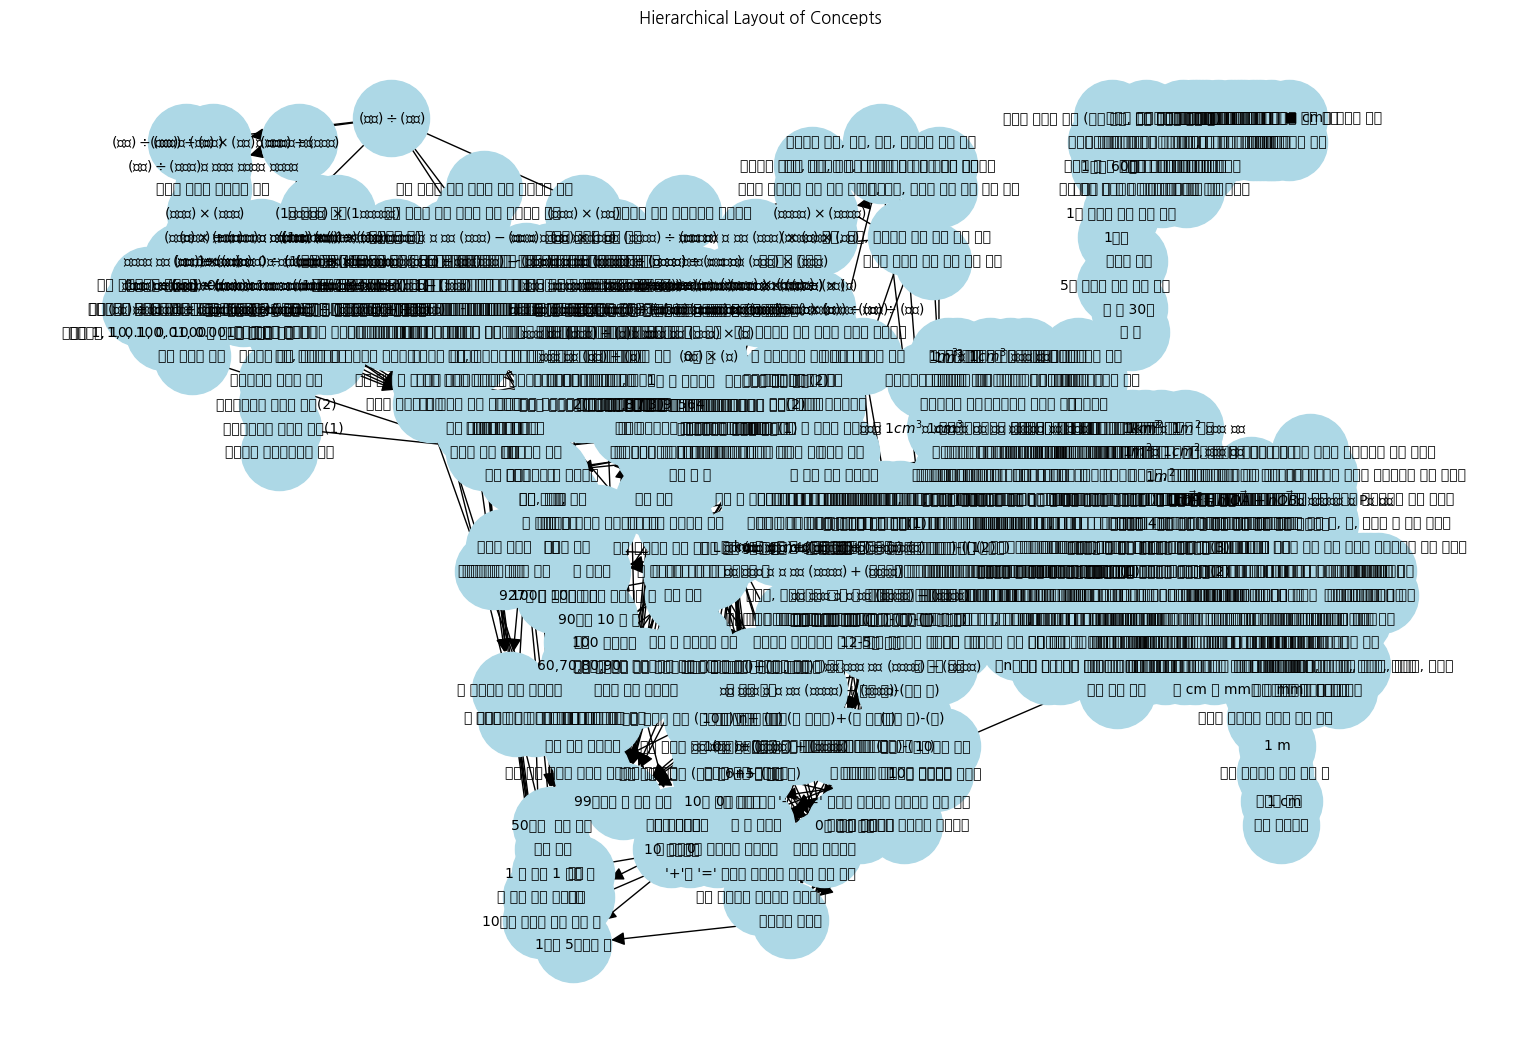

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.font_manager as fm

# CSV 파일 로드
file_path = "https://github.com/HKarin426/KST_base_e_math_lack_model/raw/ffc3ff5763ec15751d5d4c5b1a0abf9fb97303e4/label.csv"  # 로컬 파일 경로로 수정해주세요
df = pd.read_csv(file_path, encoding='utf-8-sig')

# 'to_semester' 열에서 '초등'으로 시작하는 데이터 필터링
filtered_df = df[df['to_semester'].str.startswith('초등', na=False)]

# Directed Graph 생성
G = nx.DiGraph()

# 'from_name'과 'to_name' 컬럼을 사용해 엣지 추가
edges = list(zip(filtered_df['from_name'], filtered_df['to_name']))
G.add_edges_from(edges)

# 한글 폰트 설정
font_path = fm.findSystemFonts(fontpaths=None, fontext='ttf')[0]
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumGothic'

# 그래프 그리기 (계층형 레이아웃)
plt.figure(figsize=(15, 10))
pos = nx.nx_agraph.graphviz_layout(G, prog='dot')  # Graphviz로 계층형 레이아웃 설정
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, arrowsize=20)
plt.title("Hierarchical Layout of Concepts")
plt.show()


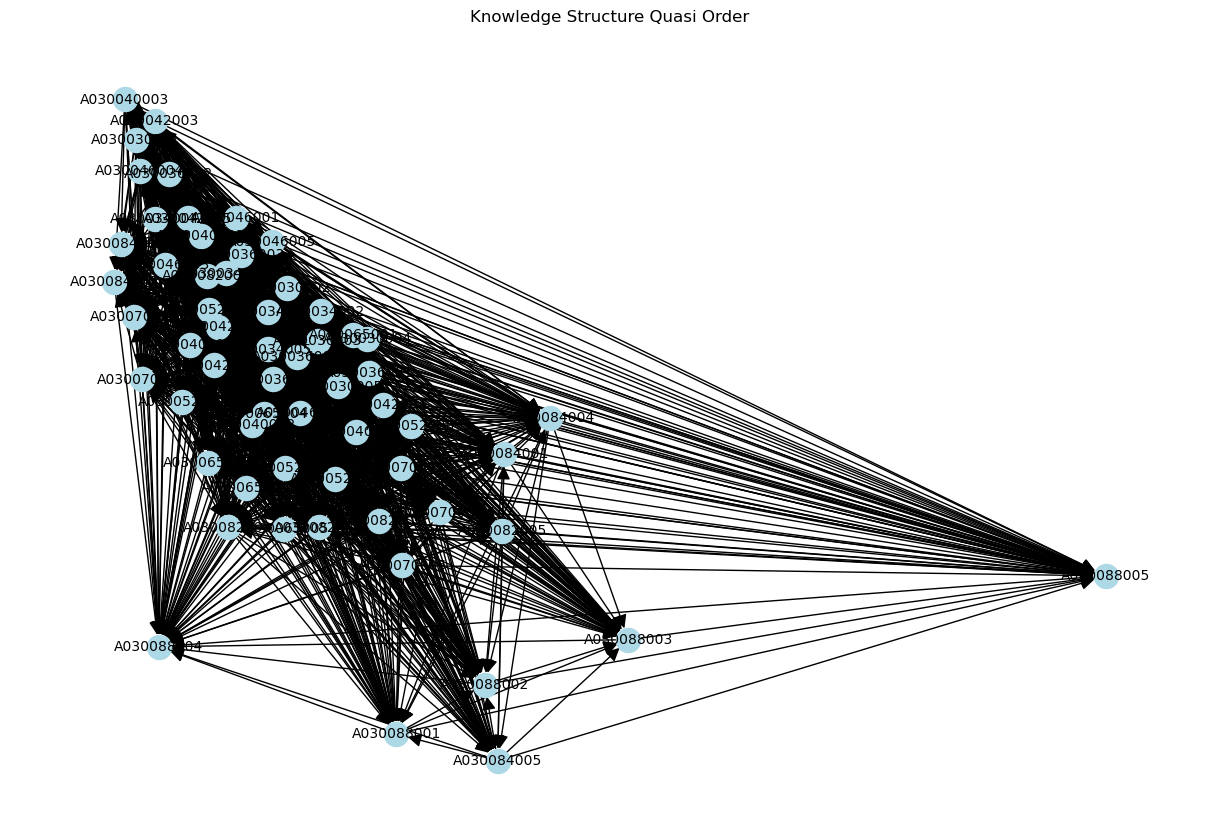

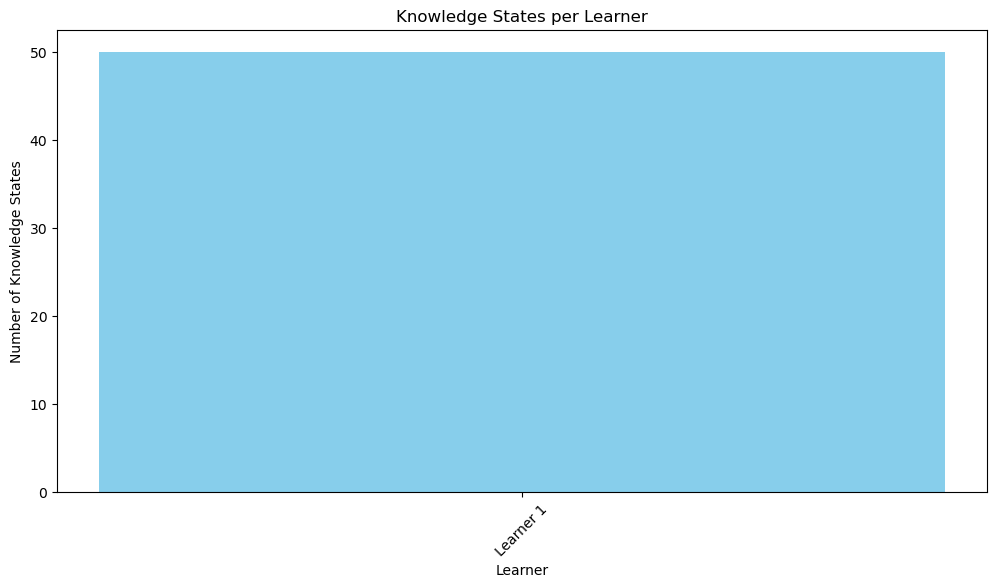

In [3]:
# Re-importing necessary libraries and re-loading data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations

# Reload the datasets
url_label = "https://github.com/HKarin426/KST_base_e_math_lack_model/raw/ffc3ff5763ec15751d5d4c5b1a0abf9fb97303e4/label.csv"

label_data = pd.read_csv(url_label)
# merged_data = pd.read_csv(r'D:\다운로드\merged_data.csv')
merged_data = pd.read_csv('./A030000385.csv')

# Data cleaning and transformation
label_data_clean = label_data.dropna(subset=['from_id', 'to_id'])
merged_data_clean = merged_data.dropna(subset=['learnerID', 'assessmentItemID', 'answerCode'])

# Prepare learner responses matrix
learner_responses = merged_data_clean.pivot_table(
    index='learnerID', 
    columns='assessmentItemID', 
    values='answerCode', 
    fill_value=0
)

# Implementing IITA model
def count_counterexamples(data, item_pairs):
    counterexamples = {}
    for i, j in item_pairs:
        counterexamples[(i, j)] = np.sum((data[i] == 0) & (data[j] == 1))
    return counterexamples

def generate_quasi_orders(data):
    items = data.columns
    item_pairs = combinations(items, 2)
    counterexamples = count_counterexamples(data, item_pairs)
    
    quasi_orders = []
    current_order = set()
    
    while counterexamples:
        best_pair = min(counterexamples, key=counterexamples.get)
        best_value = counterexamples[best_pair]
        current_order.add(best_pair)
        quasi_orders.append((best_pair, best_value))
        del counterexamples[best_pair]
    
    return current_order, quasi_orders

# Generate quasi orders from learner responses
current_order, quasi_orders = generate_quasi_orders(learner_responses)

# Visualize the Quasi Order as a Directed Graph using NetworkX
def visualize_quasi_order(quasi_order):
    G = nx.DiGraph()
    G.add_edges_from(quasi_order)
    
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', arrowsize=20, font_size=10)
    plt.title('Knowledge Structure Quasi Order')
    plt.show()

# Visualize the knowledge states in a simple bar graph for each learner
def visualize_knowledge_states(knowledge_states):
    state_counts = [len(state) for state in knowledge_states]
    
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(state_counts)), state_counts, color='skyblue')
    plt.xlabel('Learner')
    plt.ylabel('Number of Knowledge States')
    plt.title('Knowledge States per Learner')
    plt.xticks(range(len(state_counts)), [f"Learner {i+1}" for i in range(len(state_counts))], rotation=45)
    plt.show()

# Identify knowledge states
def identify_knowledge_states(quasi_order, learner_data):
    knowledge_states = []
    for learner in learner_data.index:
        state = set()
        for (i, j) in quasi_order:
            if learner_data.at[learner, i] == 1:
                state.add(i)
            if learner_data.at[learner, j] == 1:
                state.add(j)
        knowledge_states.append(state)
    return knowledge_states

# Generating knowledge states
knowledge_states = identify_knowledge_states(current_order, learner_responses)

# Visualizing the derived quasi order from IITA model
visualize_quasi_order(current_order)

# Visualizing the knowledge states of each learner
visualize_knowledge_states(knowledge_states)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations

# Reload the datasets
url_label = "https://github.com/HKarin426/KST_base_e_math_lack_model/raw/ffc3ff5763ec15751d5d4c5b1a0abf9fb97303e4/label.csv"

label_data = pd.read_csv(url_label)
filtered_label_data = label_data[label_data['to_semester'].str.contains('초등', na=False)]

merged_data = pd.read_csv(r'D:\다운로드\merged_data.csv')

label_data_clean = filtered_label_data.dropna(subset=['from_id', 'to_id'])
merged_data_clean = merged_data.dropna(subset=['learnerID', 'assessmentItemID', 'answerCode'])

# 학습자 응답 데이터를 행렬 형태로 변환 (학습자 x 문항)
learner_responses = merged_data_clean.pivot_table(
    index='learnerID', 
    columns='assessmentItemID', 
    values='answerCode', 
    fill_value=0
)

# IITA 알고리즘 최적화
def count_counterexamples(data, items):
    # 모든 항목에 대해 0인 경우와 1인 경우를 벡터 연산으로 처리
    item_matrix = data.to_numpy()
    counterexamples = np.dot((1 - item_matrix).T, item_matrix)
    return {(i, j): counterexamples[i_idx, j_idx]
            for i_idx, i in enumerate(items)
            for j_idx, j in enumerate(items) if i != j}

def generate_quasi_orders(data):
    items = list(data.columns)
    counterexamples = count_counterexamples(data, items)
    
    current_order = set()
    quasi_orders = []

    # 반복을 줄이기 위해 가장 적은 반례 순으로 정렬
    for (i, j), count in sorted(counterexamples.items(), key=lambda x: x[1]):
        current_order.add((i, j))
        quasi_orders.append(((i, j), count))

    return current_order, quasi_orders

# 최적화된 준순서 생성
current_order, quasi_orders = generate_quasi_orders(learner_responses)

# 준순서 시각화
def visualize_quasi_order(quasi_order):
    G = nx.DiGraph()
    G.add_edges_from(quasi_order)
    
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', arrowsize=20, font_size=10)
    plt.title('Knowledge Structure Quasi Order')
    plt.show()

# 지식 상태 시각화
def visualize_knowledge_states(knowledge_states):
    state_counts = [len(state) for state in knowledge_states]
    
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(state_counts)), state_counts, color='skyblue')
    plt.xlabel('Learner')
    plt.ylabel('Number of Knowledge States')
    plt.title('Knowledge States per Learner')
    plt.xticks(range(len(state_counts)), [f"Learner {i+1}" for i in range(len(state_counts))], rotation=45)
    plt.show()

# 지식 상태 도출
def identify_knowledge_states(quasi_order, learner_data):
    knowledge_states = []
    for learner in learner_data.index:
        state = set()
        for (i, j) in quasi_order:
            if learner_data.at[learner, i] == 1:
                state.add(i)
            if learner_data.at[learner, j] == 1:
                state.add(j)
        knowledge_states.append(state)
    return knowledge_states

# 지식 상태 생성 및 시각화
knowledge_states = identify_knowledge_states(current_order, learner_responses)
visualize_quasi_order(current_order)
visualize_knowledge_states(knowledge_states)


KeyboardInterrupt: 

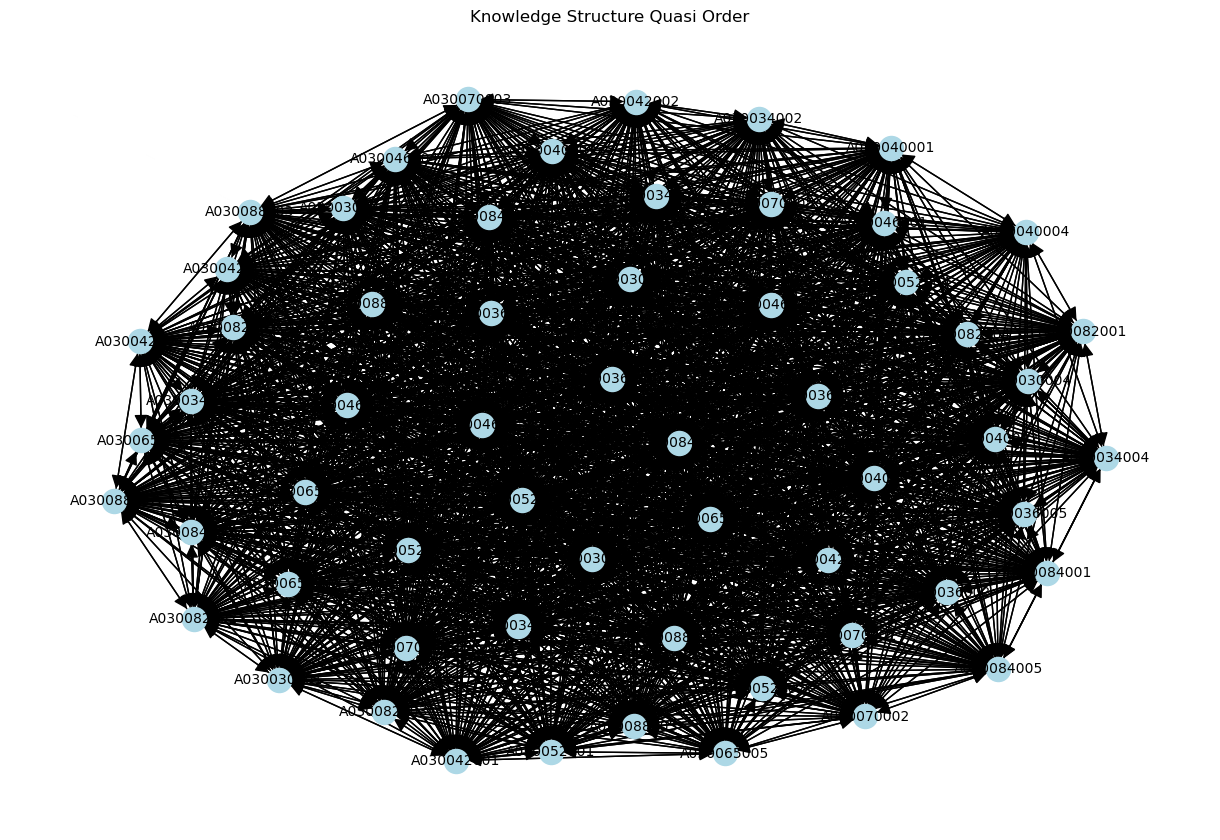

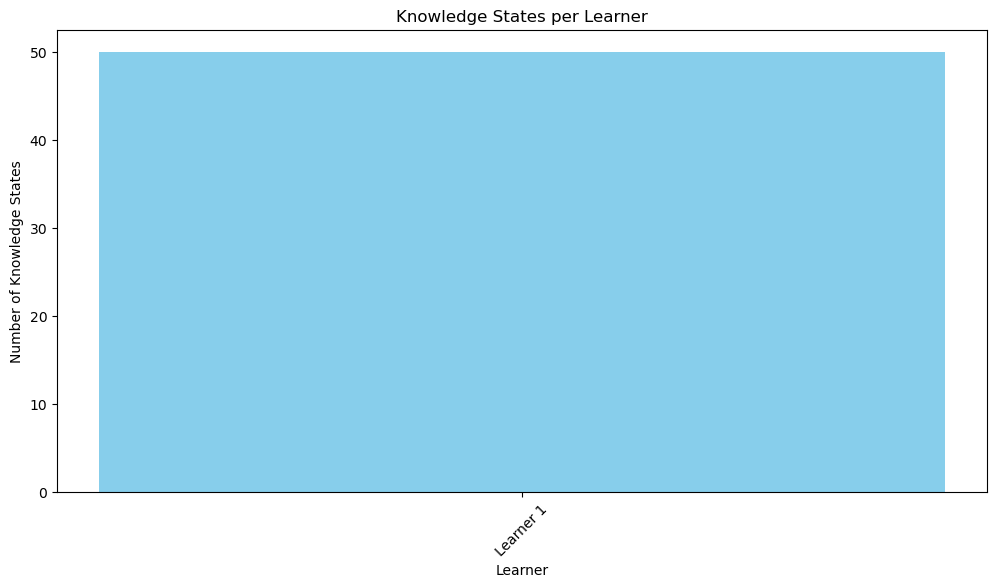

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations

# Reload the datasets
url_label = "https://github.com/HKarin426/KST_base_e_math_lack_model/raw/ffc3ff5763ec15751d5d4c5b1a0abf9fb97303e4/label.csv"

label_data = pd.read_csv(url_label)
filtered_label_data = label_data[label_data['to_semester'].str.contains('초등', na=False)]

# merged_data = pd.read_csv(r'D:\다운로드\merged_data.csv')
merged_data = pd.read_csv('./A030000385.csv')


label_data_clean = filtered_label_data.dropna(subset=['from_id', 'to_id'])
merged_data_clean = merged_data.dropna(subset=['learnerID', 'assessmentItemID', 'answerCode'])

# 학습자 응답 데이터를 행렬 형태로 변환 (학습자 x 문항)
learner_responses = merged_data_clean.pivot_table(
    index='learnerID', 
    columns='assessmentItemID', 
    values='answerCode', 
    fill_value=0
)

# IITA 알고리즘 최적화
def count_counterexamples(data, items):
    # 모든 항목에 대해 0인 경우와 1인 경우를 벡터 연산으로 처리
    item_matrix = data.to_numpy()
    counterexamples = np.dot((1 - item_matrix).T, item_matrix)
    return {(i, j): counterexamples[i_idx, j_idx]
            for i_idx, i in enumerate(items)
            for j_idx, j in enumerate(items) if i != j}

def generate_quasi_orders(data):
    items = list(data.columns)
    counterexamples = count_counterexamples(data, items)
    
    current_order = set()
    quasi_orders = []

    # 반복을 줄이기 위해 가장 적은 반례 순으로 정렬
    for (i, j), count in sorted(counterexamples.items(), key=lambda x: x[1]):
        current_order.add((i, j))
        quasi_orders.append(((i, j), count))

    return current_order, quasi_orders

# 최적화된 준순서 생성
current_order, quasi_orders = generate_quasi_orders(learner_responses)

# 준순서 시각화
def visualize_quasi_order(quasi_order):
    G = nx.DiGraph()
    G.add_edges_from(quasi_order)
    
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', arrowsize=20, font_size=10)
    plt.title('Knowledge Structure Quasi Order')
    plt.show()

# 지식 상태 시각화
def visualize_knowledge_states(knowledge_states):
    state_counts = [len(state) for state in knowledge_states]
    
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(state_counts)), state_counts, color='skyblue')
    plt.xlabel('Learner')
    plt.ylabel('Number of Knowledge States')
    plt.title('Knowledge States per Learner')
    plt.xticks(range(len(state_counts)), [f"Learner {i+1}" for i in range(len(state_counts))], rotation=45)
    plt.show()

# 지식 상태 도출
def identify_knowledge_states(quasi_order, learner_data):
    knowledge_states = []
    for learner in learner_data.index:
        state = set()
        for (i, j) in quasi_order:
            if learner_data.at[learner, i] == 1:
                state.add(i)
            if learner_data.at[learner, j] == 1:
                state.add(j)
        knowledge_states.append(state)
    return knowledge_states

# 지식 상태 생성 및 시각화
knowledge_states = identify_knowledge_states(current_order, learner_responses)
visualize_quasi_order(current_order)
visualize_knowledge_states(knowledge_states)


Number of nodes: 2
Number of edges: 1


c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


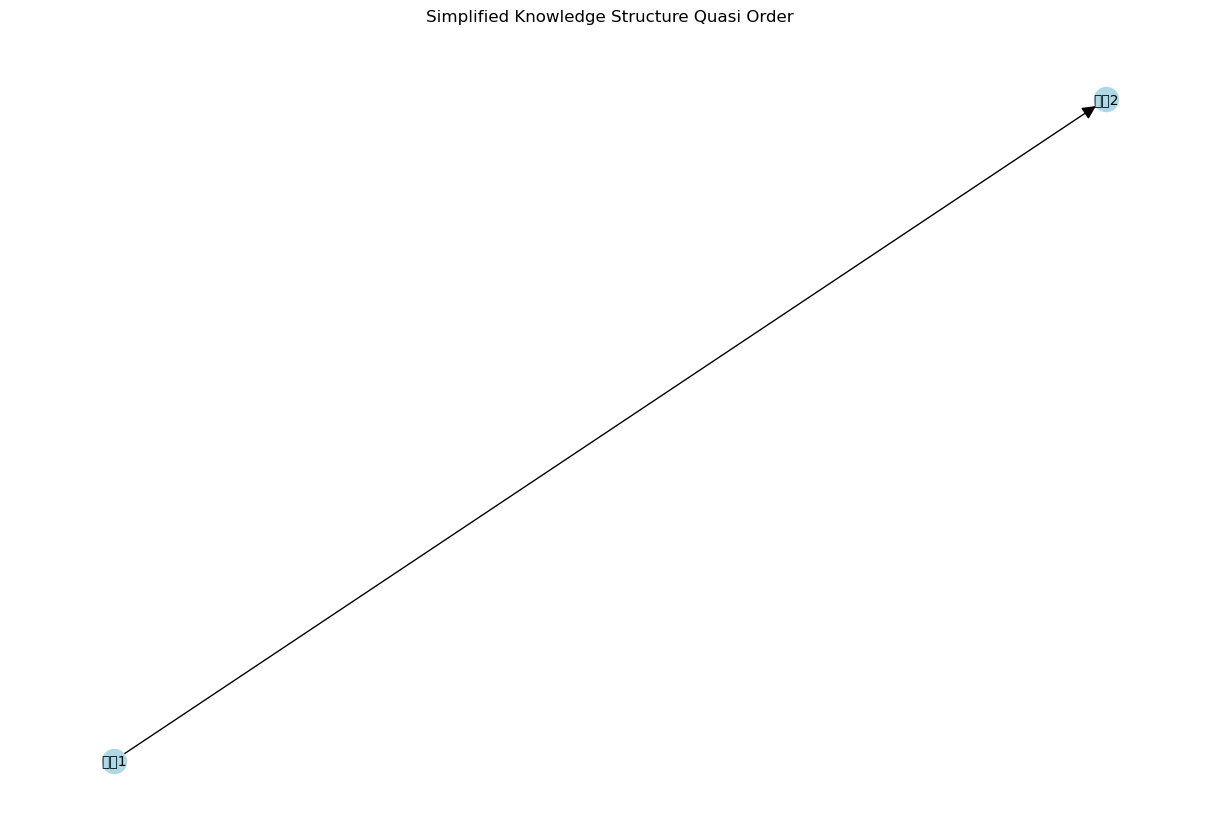

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# 그래프 초기화 및 데이터 확인
G = nx.DiGraph()  # 원래의 그래프를 여기서 초기화하고 엣지를 추가해야 합니다.

# 가중치가 포함된 엣지 추가 예시 (여기에 실제 데이터를 기반으로 엣지를 추가)
G.add_edge('노드1', '노드2', weight=3)

# 필터링 기준을 낮추어 그래프를 단순화하는 함수
def simplify_graph(graph, weight_threshold=0):  # 임계값을 낮춰 시도해보세요
    simplified_graph = nx.DiGraph()
    simplified_graph.add_nodes_from(graph.nodes(data=True))
    
    # 엣지 추가 및 가중치 기준 적용
    for (u, v, d) in graph.edges(data=True):
        if d.get('weight', 1) >= weight_threshold:
            simplified_graph.add_edge(u, v, **d)
    
    # 노드 및 엣지 수 확인
    print(f"Number of nodes: {simplified_graph.number_of_nodes()}")
    print(f"Number of edges: {simplified_graph.number_of_edges()}")
    
    return simplified_graph

# 필터링 기준 재조정 및 시각화
simplified_G = simplify_graph(G, weight_threshold=0)  # 임계값을 0으로 하여 모든 엣지를 포함

# 그래프 시각화
plt.figure(figsize=(12, 8))
if simplified_G.number_of_nodes() > 0:  # 그래프가 비어있지 않은 경우에만 시각화
    pos = nx.spring_layout(simplified_G)
    nx.draw(simplified_G, pos, with_labels=True, node_color='lightblue', arrowsize=20, font_size=10)
    plt.title('Simplified Knowledge Structure Quasi Order')
    plt.show()
else:
    print("Simplified graph is empty.")
